In [1]:
import numpy as np
import platform

from Engine.global_clock import GlobalClock, Agent

def my_print(*args):
    if platform.system() == 'Windows':
        print(*args)

In [11]:
class TimedAgent(Agent):
    def __init__(self, update_rate, start_time):
        super().__init__(update_rate, start_time)
    
    def test_print(self, time):
        if super().check_time(time):
            my_print('A-ha! It is now {time}'.format(time = time))

In [14]:
GC = GlobalClock(1/30, 2, start=0)
TA1 = TimedAgent(10, 0)

while GC.time <= 5:
    TA1.test_print(GC.time)
    GC.update()

A-ha! It is now 0
A-ha! It is now 0.1
A-ha! It is now 0.2333333333333333
A-ha! It is now 0.3333333333333333
A-ha! It is now 0.4333333333333333
A-ha! It is now 0.5333333333333333
A-ha! It is now 0.6
A-ha! It is now 0.7
A-ha! It is now 0.7999999999999999
A-ha! It is now 0.8999999999999999
A-ha! It is now 0.9999999999999999
A-ha! It is now 1.1
A-ha! It is now 1.2000000000000004
A-ha! It is now 1.3000000000000007
A-ha! It is now 1.400000000000001
A-ha! It is now 1.5000000000000013
A-ha! It is now 1.6000000000000016
A-ha! It is now 1.700000000000002
A-ha! It is now 1.8000000000000023
A-ha! It is now 1.9000000000000026
A-ha! It is now 2.0000000000000027
A-ha! It is now 2.1000000000000023
A-ha! It is now 2.200000000000002
A-ha! It is now 2.3000000000000016
A-ha! It is now 2.4000000000000012
A-ha! It is now 2.500000000000001
A-ha! It is now 2.6333333333333337
A-ha! It is now 2.7333333333333334
A-ha! It is now 2.833333333333333
A-ha! It is now 2.9333333333333327
A-ha! It is now 3.03333333333333

In [9]:
TA1.check_time(0)

True

In [10]:
TA1.next_update_time

0.1

In [10]:
import numpy as np
import pandas as pd

test = np.empty(3)
test[:] = np.NaN
test

array([nan, nan, nan])

In [11]:
np.array([None, 1])==None

array([ True, False])

In [15]:
class FlightPlan(object):
    def __init__(self,
                 leg_num,
                 leg_spd,
                 mode,
                 wpt_start, wpt_start_time,
                 wpt_end, wpt_end_time):
        self.plan = pd.DataFrame({'Leg No.':leg_num, 'Target Speed':leg_spd, 'Mode':mode, 
                                  'Starting Wpt':wpt_start, 'EDT':wpt_start_time, 
                                  'Ending Wpt':wpt_end, 'ETA':wpt_end_time})
        
# testplan = FlightPlan([1,2,3,4], [5,5,5,5], ['Direct', 'Direct', 'Direct', 'Direct'], 
#                      [[0,10,0],[50,0,0],[50,50,0],[70,70,20]],[np.NaN, np.NaN, np.NaN, np.NaN],
#                      [[50,0,0],[50,50,0],[70,70,20],[0,0,0]],[np.NaN, np.NaN, np.NaN, np.NaN] )

testplan = FlightPlan([1,2], [0, 0], ['Hover','Hover'], 
                     [[10,0,0],[10,0,0]],[0, 20],
                     [[10,0,0],[10,0,0]],[20, 40])

testplan.plan

,Leg No.,Target Speed,Mode,Starting Wpt,EDT,Ending Wpt,ETA
0,1,0,Hover,"[10, 0, 0]",0,"[10, 0, 0]",20
1,2,0,Hover,"[10, 0, 0]",20,"[10, 0, 0]",40


In [6]:
interval = 0.001

class PID_test(object):
    def __init__(self, PID):
        self.p = PID[0]
        self.i = PID[1]
        self.d = PID[2]
        self.p_err = 0
        self.i_err = 0
        self.d_err = 0
        self.err = 0
        self.interval = interval
    def calc_pseudo_f(self, err):
        self.i_err += err
        self.d_err = (err - self.err)/interval
        self.err = err
        return self.p * err + self.i * self.i_err + self.d_err * self.d
    
num = 100000

x_pos = 10
x_dot = 0
time = 0

x_list = [x_pos]
x_dot_list = [x_dot]
time_list = [time]

x_pos_tgt = 0
x_spd_tgt = 10

# Hover controller
# controller = PID_test([1, 0, 0.8])
# Speed controller
controller = PID_test([1, 0, 0.8])

for i in range(num):
    # error = -(x_pos - x_pos_tgt)
    error = -(x_dot - x_spd_tgt)
    accel = controller.calc_pseudo_f(error)
    x_pos += interval * x_dot
    x_dot += accel * interval
    time += interval
    
    x_list.append(x_pos)
    x_dot_list.append(x_dot)
    time_list.append(time)

Text(0.5, 1.0, 'Velocity trace')

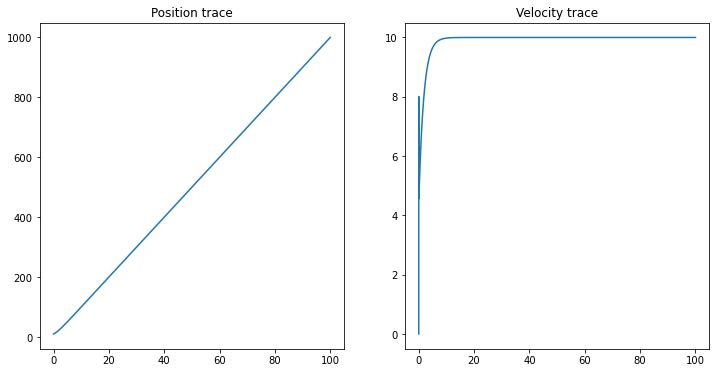

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].plot(time_list, x_list)
ax[0].set_title('Position trace')

ax[1].plot(time_list, x_dot_list)
ax[1].set_title('Velocity trace')

In [1]:
import pandas as pd

df = pd.DataFrame({'a':[1 ,2], 'b':[3, 4]})
df.iloc[0]['a']

1

In [10]:
from math import comb

numerator = comb(57, 20) * comb(37, 20) * 3

denominator = comb(60, 20) * comb(40, 20)

print(numerator/denominator)

0.09994155464640561


In [9]:
comb(3,3)

1

In [11]:
def calculator(k):
    numerator = comb(k*3-3, k) * comb(k*2-3, k) * 3
    denominator = comb(k*3, k) * comb(k*2, k)
    return numerator/denominator

calculator(20)

0.09994155464640561

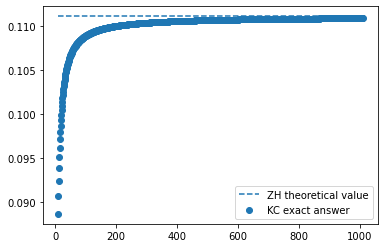

In [17]:
import matplotlib.pyplot as plt

k = 10
ks = []
prob = []
zh_theoretical = 1/9
zh_th = []
for i in range(1000):
    ks.append(k)
    prob.append(calculator(k))
    zh_th.append(zh_theoretical)
    k += 1

fig, ax = plt.subplots()
ax.scatter(ks, prob, label='KC exact answer')
ax.plot(ks, zh_th, '--', label = 'ZH theoretical value')
ax.legend()

plt.show()

In [21]:
class state(object):
    def __init__(self):
        self.cat = 1
        # self.trajectory = []
    def return_dict(self):
        return self.__dict__ 
    def update(self):
        self.trajectory.append(self.return_dict().copy())

cat = state()

cat.return_dict()

{'cat': 1}

In [24]:
df.copy()

,a,b
0,1,3
1,2,4


In [25]:
a = [0, 1]
df = pd.DataFrame({'a':a})
df

,a
0,0
1,1


In [26]:
a[0] = 1
a

[1, 1]

In [27]:
df

,a
0,0
1,1


In [4]:
import numpy as np

f = np.array([2,3,5])
f[2] = np.clip(f[2], 8, 16)
f

array([2, 3, 8])